In [3]:
%pip install yfinance
%pip install streamlit

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import Libs
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import yfinance as yfin
yfin.pdr_override()

import math


In [ ]:
#define starting and ending points and scrape stock data from yahoo finance
start = '2012-01-01'
end = '2022-09-01'

df = pdr.get_data_yahoo('AAPL', data_source='yahoo', start = start, end = end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.reset_index()

In [ ]:
#get rid of data and adj close columns
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,14.621429,14.732143,14.607143,14.686786,302220800
1,14.642857,14.810000,14.617143,14.765714,260022000
2,14.819643,14.948214,14.738214,14.929643,271269600
3,14.991786,15.098214,14.972143,15.085714,318292800
4,15.196429,15.276786,15.048214,15.061786,394024400


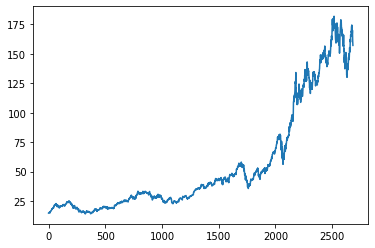

In [ ]:
#plot closing price of stock
plt.plot(df.Close)

In [ ]:
#Create 100 day moving average of stock
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2679    154.0556
2680    153.9074
2681    153.7706
2682    153.6414
2683    153.4922
Name: Close, Length: 2684, dtype: float64

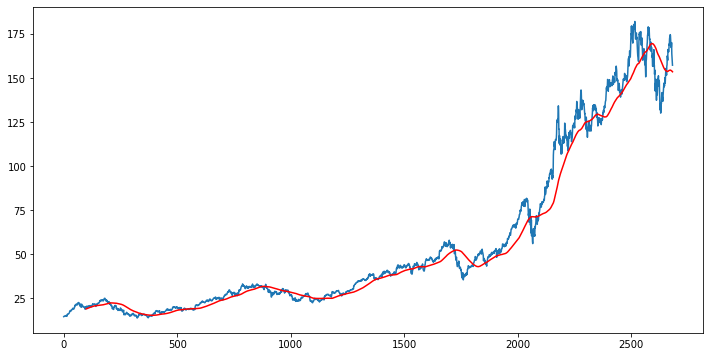

In [ ]:
#Plot stock closing price and 100 day moving average
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')

In [ ]:
#Create 200 day moving average of stock
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2679    160.80195
2680    160.86600
2681    160.93330
2682    160.98850
2683    161.02465
Name: Close, Length: 2684, dtype: float64

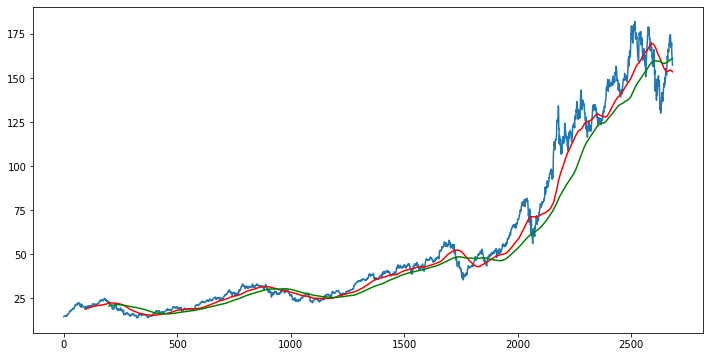

In [ ]:
#Plot stock closing price, 100 day moving average, and 200 day moving average
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100 , 'r')
plt.plot(ma200 , 'g')

In [ ]:
#Get rows and columns of data frame
df.shape

(2684, 5)

In [ ]:
#Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1878, 1)
(806, 1)


In [ ]:
#See training data
data_training.tail()

,Close
1873,48.185001
1874,48.472500
1875,49.612499
1876,49.467499
1877,49.865002


In [ ]:
#See testing data
data_testing.head()

,Close
1878,49.695000
1879,49.645000
1880,48.892502
1881,49.950001
1882,49.935001


In [ ]:
#Scale data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01677525],
       [0.01856622],
       [0.02228596],
       ...,
       [0.80928064],
       [0.80599041],
       [0.81501021]])

In [ ]:
#create training models and convert them to np arrays
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
#Create ML Model
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True ))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train,y_train,epochs = 50)

Epoch 1/50
56/56 [==============================] - 32s 402ms/step - loss: 0.0425
Epoch 2/50
56/56 [==============================] - 15s 269ms/step - loss: 0.0089
Epoch 3/50
56/56 [==============================] - 15s 272ms/step - loss: 0.0079
Epoch 4/50
56/56 [==============================] - 15s 268ms/step - loss: 0.0075
Epoch 5/50
56/56 [==============================] - 15s 268ms/step - loss: 0.0061
Epoch 6/50
56/56 [==============================] - 17s 300ms/step - loss: 0.0064
Epoch 7/50
56/56 [==============================] - 15s 269ms/step - loss: 0.0059
Epoch 8/50
56/56 [==============================] - 15s 269ms/step - loss: 0.0052
Epoch 9/50
56/56 [==============================] - 15s 268ms/step - loss: 0.0055
Epoch 10/50
56/56 [==============================] - 15s 270ms/step - loss: 0.0053
Epoch 11/50
56/56 [==============================] - 15s 269ms/step - loss: 0.0057
Epoch 12/50
56/56 [==============================] - 15s 270ms/step - loss: 0.0048
Epoch 13/50
5

In [ ]:
#save the model
model.save('keras_model.h5')

In [ ]:
data_testing.head()

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [ ]:
final_df.head()

,Close
0,38.669998
1,41.312500
2,41.610001
3,41.630001
4,42.812500


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

(906, 1)

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0]) 

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(806, 100, 1)
(806,)


In [ ]:
#making predictions

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

(806, 1)

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

array([0.00697642])

In [ ]:
scale_factor = 1/0.00697642
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

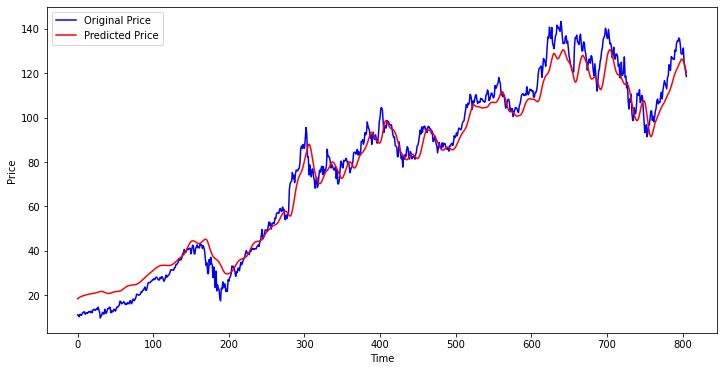

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()